<a href="https://colab.research.google.com/github/kgy1008/Data-Science-Analysis/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B3%BC%ED%95%99_%EB%B0%8F_%EB%B6%84%EC%84%9D%EC%86%8C%EA%B0%9C_week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# **강의를 보면서 코드를 완성하세요**
#사본으로 저장한후, 파일명은 자신의 이름으로 변경
#공유옵션 설정
#수업 후 패들렛에 url 작성(https://padlet.com/skyal2/23-2-huduvz6o9smm03f5)
```



In [ ]:
#라이브러리 설치
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
temp=files.upload()

Saving health_screenings_2020_1000ea.xlsx to health_screenings_2020_1000ea (1).xlsx


In [ ]:
df=pd.read_excel('/content/health_screenings_2020_1000ea.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   year           1000 non-null   int64         
 1   city_code      1000 non-null   int64         
 2   gender         1000 non-null   int64         
 3   age_code       1000 non-null   int64         
 4   height         1000 non-null   int64         
 5   weight         1000 non-null   int64         
 6   waist          1000 non-null   float64       
 7   eye_left       1000 non-null   float64       
 8   eye_right      1000 non-null   float64       
 9   hear_left      1000 non-null   int64         
 10  hear_right     1000 non-null   int64         
 11  systolic       991 non-null    float64       
 12  diastolic      991 non-null    float64       
 13  blood_sugar    991 non-null    float64       
 14  cholesterol    401 non-null    float64       
 15  triglycerides  401 non

In [ ]:
#결측값확인하기
df.isnull().sum()

year               0
city_code          0
gender             0
age_code           0
height             0
weight             0
waist              0
eye_left           0
eye_right          0
hear_left          0
hear_right         0
systolic           9
diastolic          9
blood_sugar        9
cholesterol      599
triglycerides    599
HDL              599
LDL              606
hemoglobin         9
urine_protein     13
serum              9
AST                9
ALT                9
GTP                9
smoking            0
drinking           0
oral_check         0
dental_caries    694
tartar           694
open_date          0
dtype: int64

In [ ]:
#필요한 속성 추출하기 : 'city_code','gender','age_code','weight','waist','smoking','drinking'
data=df[['city_code','gender','age_code','weight','waist','smoking','drinking']]
data

,city_code,gender,age_code,weight,waist,smoking,drinking
0,36,1,9,60,72.1,1,0
1,27,2,13,65,81.0,1,0
2,11,2,12,55,70.0,1,0
3,31,1,13,70,90.8,1,0
4,41,2,12,50,75.2,1,0
...,...,...,...,...,...,...,...
995,48,1,12,70,92.0,3,1
996,41,1,12,70,88.0,2,0
997,48,2,14,55,80.2,1,1
998,41,2,14,55,79.5,1,0


In [ ]:
#성별('gender')에 따른 명수 확인
data.value_counts('gender')

gender
2    518
1    482
dtype: int64

In [ ]:
#음주('drinking')에 따른 명수 확인
data.value_counts('drinking')

drinking
1    569
0    431
dtype: int64

In [ ]:
#흡연('smoking')에 따른 명수 확인
data.value_counts('smoking')

smoking
1    633
2    188
3    179
dtype: int64

In [ ]:
#성별에 따른 음주여부 데이터
gender_drink=data.groupby(['gender', 'drinking'])['drinking'].count()
gender_drink=gender_drink.reset_index(name='count')
gender_drink

,gender,drinking,count
0,1,0,126
1,1,1,356
2,2,0,305
3,2,1,213


<Axes: xlabel='gender', ylabel='count'>

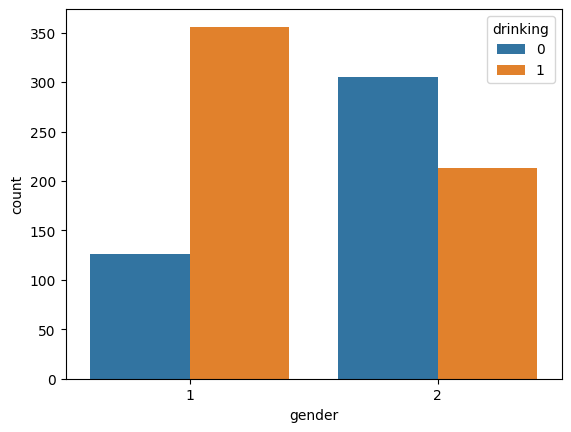

In [ ]:
#막대그래프로 성별 음주여부 인원수 시각화하기
sns.barplot(data=gender_drink, x='gender', y='count', hue='drinking')

In [ ]:
#성별에 따른 흡연여부 데이터
gender_smoking=data.groupby(['gender', 'smoking'])['smoking'].count()
gender_smoking=gender_smoking.reset_index(name='count')
gender_smoking

,gender,smoking,count
0,1,1,145
1,1,2,176
2,1,3,161
3,2,1,488
4,2,2,12
5,2,3,18


<Axes: xlabel='gender', ylabel='count'>

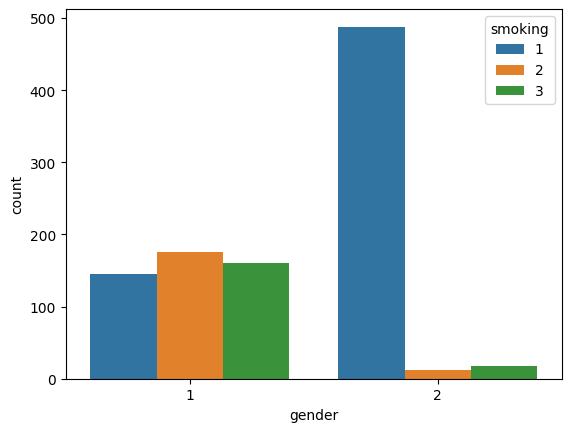

In [ ]:
#막대그래프로 성별 흡연여부 인원수 시각화하기
sns.barplot(data=gender_smoking, x='gender', y='count', hue='smoking')

<Axes: xlabel='gender', ylabel='count'>

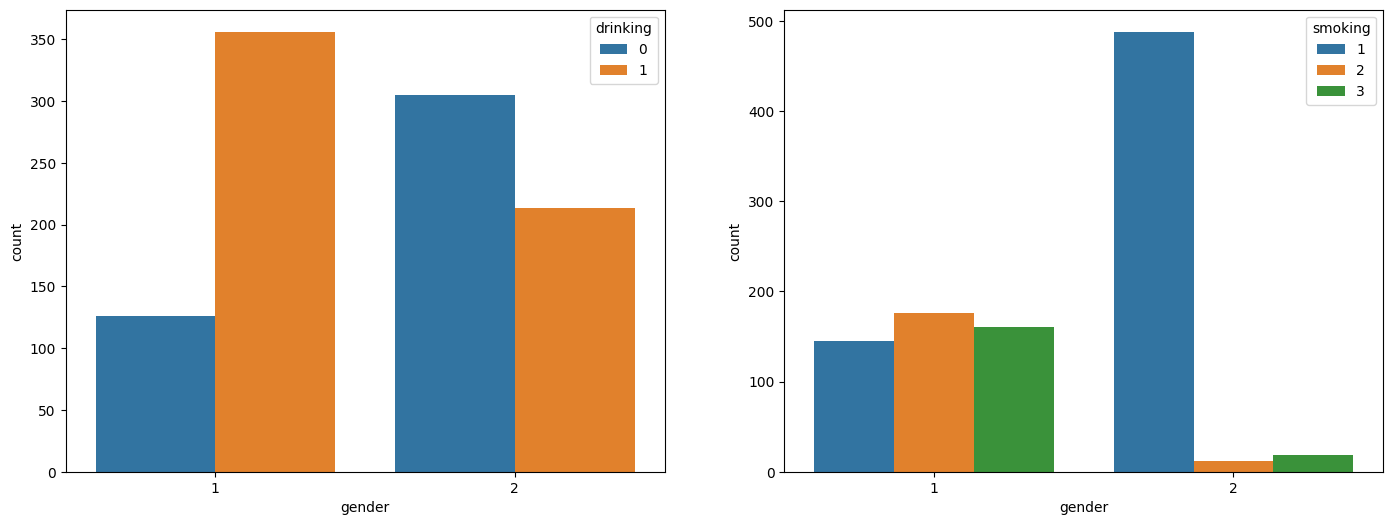

In [ ]:
#2개의 그래프 동시에 나타내기
fig=plt.figure(figsize=(17,6))
area1=fig.add_subplot(1,2,1)
area2=fig.add_subplot(1,2,2)
sns.barplot(data=gender_drink, x='gender',y='count', hue='drinking', ax=area1)
sns.barplot(data=gender_smoking, x='gender',y='count', hue='smoking', ax=area2)

<Axes: xlabel='waist', ylabel='weight'>

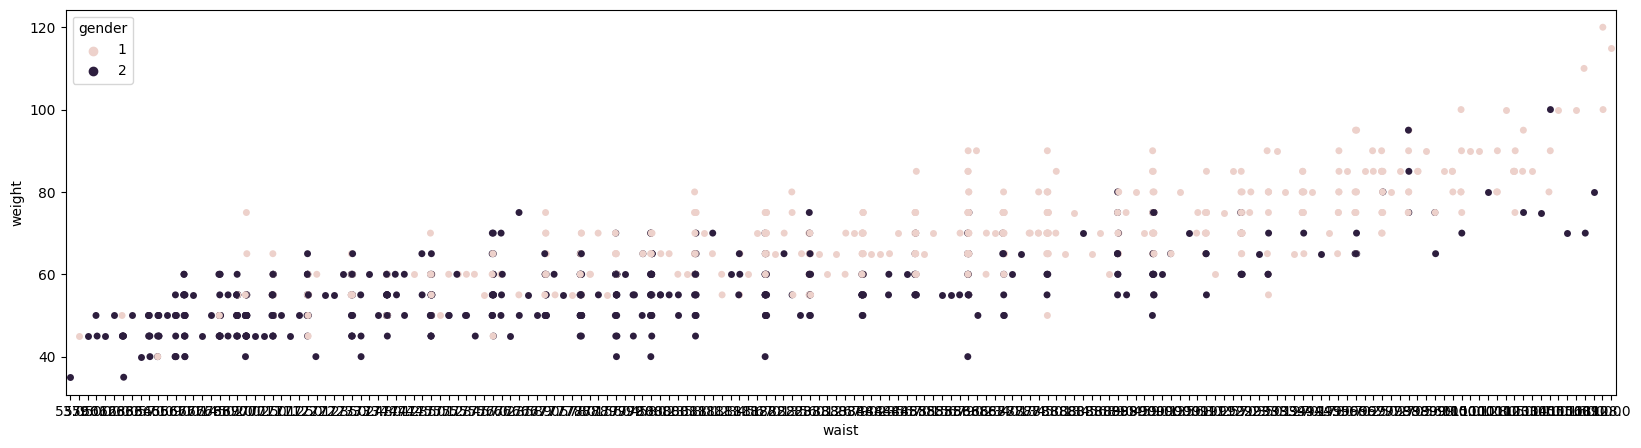

In [ ]:
#성별에 따른 허리둘레와 몸무게 stripplot
plt.figure(figsize=(20,5))
sns.stripplot(data=data, x='waist', y='weight', hue='gender')

<Axes: xlabel='waist', ylabel='weight'>

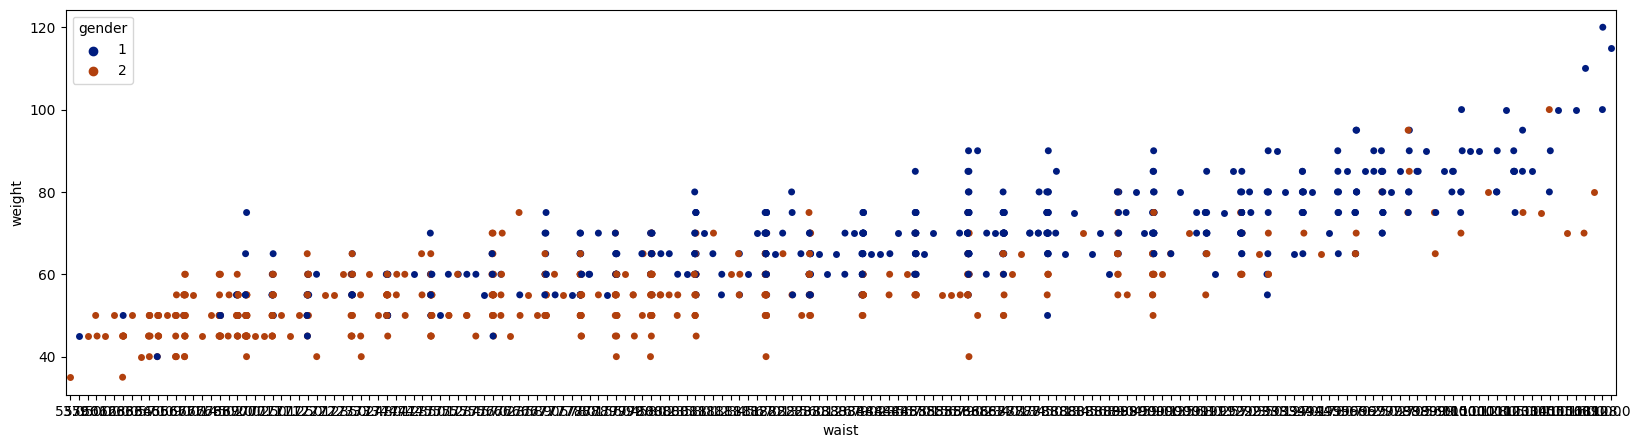

In [ ]:
#stripplot에서 팔레트지정
plt.figure(figsize=(20,5))
sns.stripplot(data=data, x='waist',y='weight',hue='gender',palette='dark')

<Axes: xlabel='weight', ylabel='Count'>

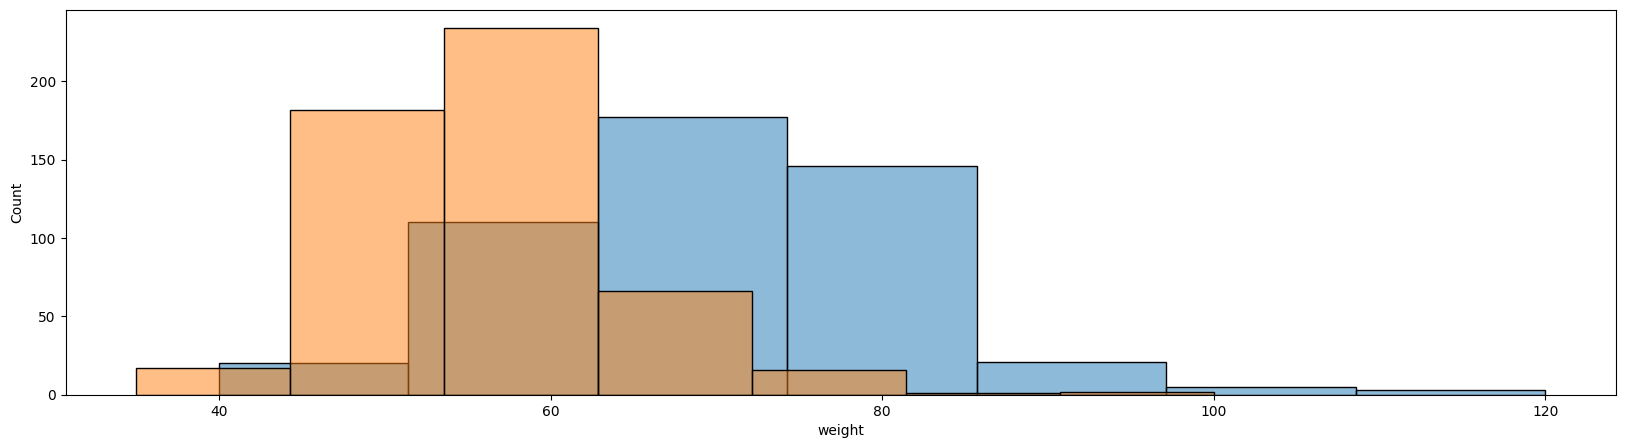

In [ ]:
#성별에 따른 몸무게 히스토그램
male_data=data[data.gender==1]
female_data=data[data.gender==2]
plt.figure(figsize=(20,5))
sns.histplot(male_data['weight'], bins=7, alpha=0.5)
sns.histplot(female_data['weight'], bins=7, alpha=0.5)

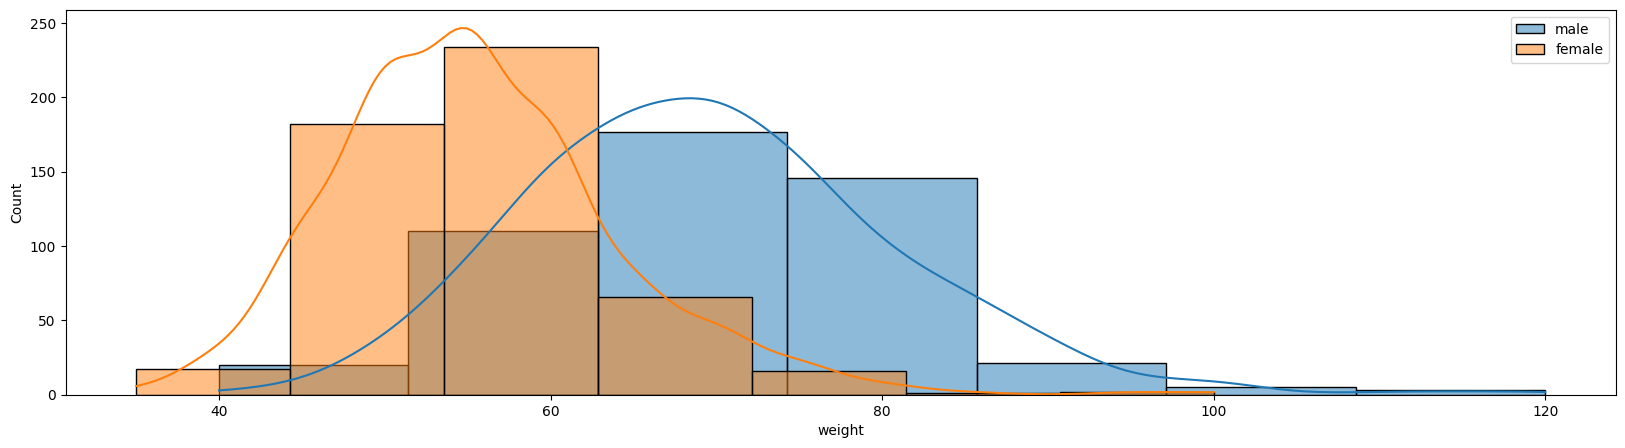

In [ ]:
male_data=data[data.gender==1]
female_data=data[data.gender==2]
plt.figure(figsize=(20,5))
sns.histplot(male_data['weight'],kde=True, bins=7,alpha=0.5,label='male')
sns.histplot(female_data['weight'],kde=True, bins=7,alpha=0.5,label='female')
plt.legend()

<Axes: xlabel='drinking', ylabel='weight'>

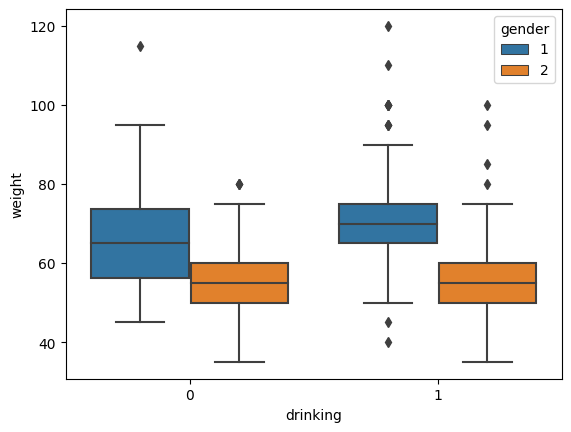

In [ ]:
#성별에 따른 음주 여부와 몸무게 boxplot
sns.boxplot(data=data, x='drinking', y='weight', hue='gender')

<Axes: xlabel='weight', ylabel='drinking'>

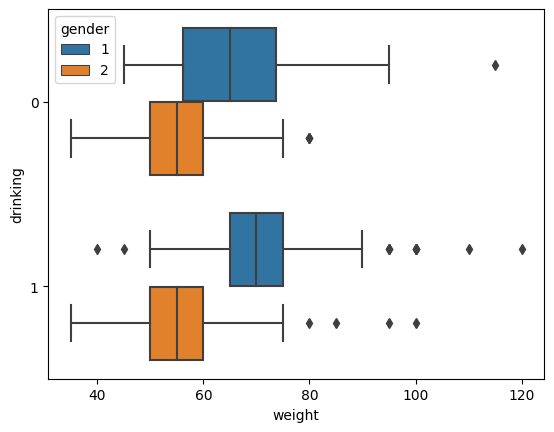

In [ ]:
sns.boxplot(data=data, x='weight', y='drinking', hue='gender', orient='h')

<Axes: xlabel='drinking', ylabel='count'>

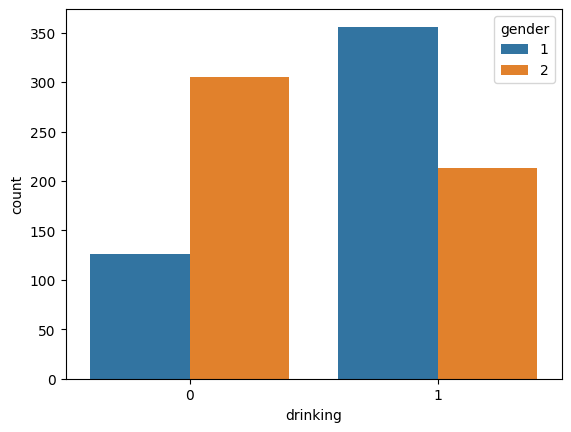

In [ ]:
#성별에 따른 음주 여부 수 : countplot
sns.countplot(data=data, x='drinking', hue='gender')

<Axes: xlabel='count', ylabel='drinking'>

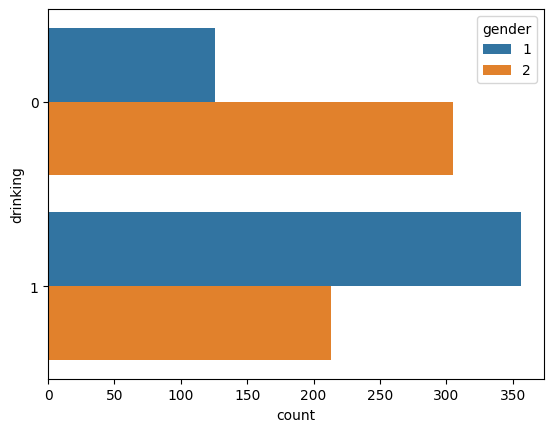

In [ ]:
sns.countplot(data=data, y='drinking', hue='gender')

<Axes: >

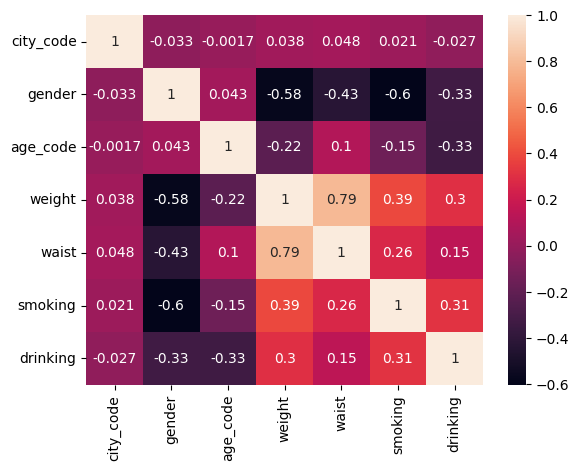

In [ ]:
# 각 속성의 상관관계를 heatmap으로 시각
c=data.corr()
sns.heatmap(c, annot=True)



```
축구선수에 대한 데이터에서 이적료에 영향을 주는 속성이 무엇인지 찾아보자
 id : 선수 고유의 아이디
 name : 이름
 age : 나이
 continent : 선수들의 국적이 포함되어 있는 대륙입니다
 contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다
 position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등
 prefer_foot : 선수가 선호하는 발입니다. ex) 오른발
 reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수
 stat_overall : 선수의 현재 능력치 입니다.
 stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.
 stat_skill_moves : 선수의 개인기 능력치 입니다.
 value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다
```



In [ ]:
temp=files.upload()

Saving FIFA_train.csv to FIFA_train (1).csv


In [ ]:
df=pd.read_csv('FIFA_train.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB




```
선수의 이적료와 관련이 있는 것은 무엇일지 본인이 생각해보고, 관련 속성에 대해 분석하기
```




<Axes: xlabel='stat_overall', ylabel='stat_potential'>

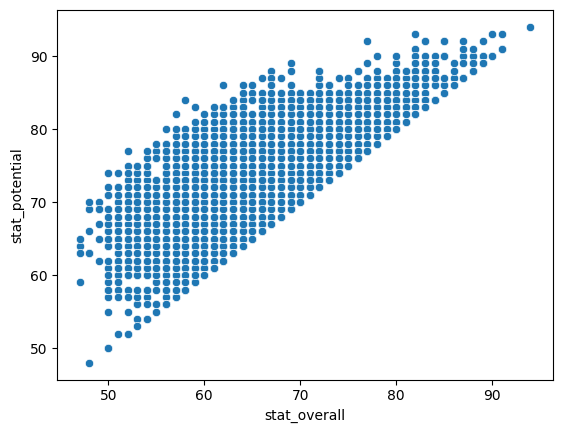

In [ ]:
#선수의 현재 능력치(stat_overall)와 발전정도(stat_potential) 간의 관계를 산점도로 시각화
sns.scatterplot(x='stat_overall',y='stat_potential',data=df)

<Axes: xlabel='stat_overall', ylabel='stat_potential'>

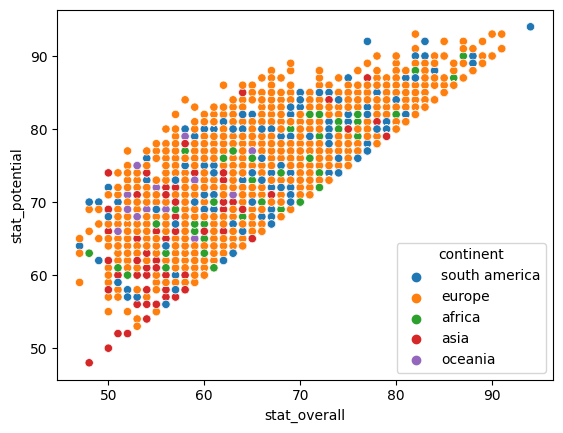

In [ ]:
#대륙으로 구별하여 선수의 현재 능력치(stat_overall)와 발전정도(stat_potential) 간의 관계를 산점도로 시각화
sns.scatterplot(x='stat_overall', y='stat_potential', data=df, hue='continent')

<Axes: xlabel='stat_overall', ylabel='stat_potential'>

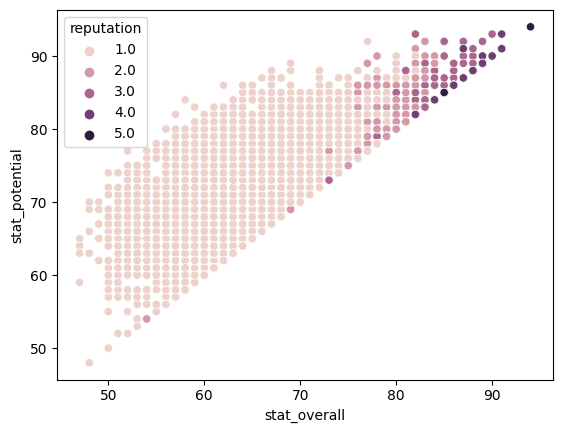

In [ ]:
#유명정도를 구분하여 선수의 현재 능력치(stat_overall)와 발전정도(stat_potential) 간의 관계를 산점도로 시각화

sns.scatterplot(x='stat_overall',y='stat_potential',data=df,hue='reputation')

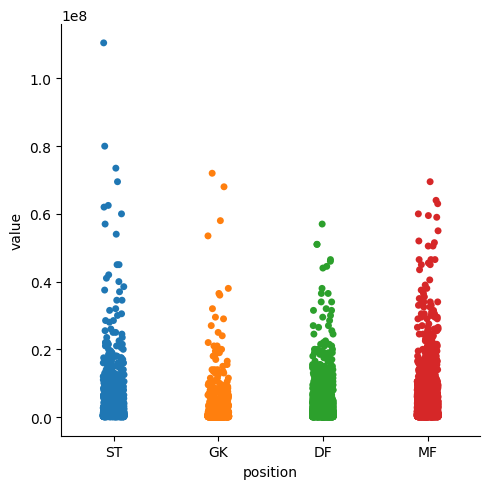

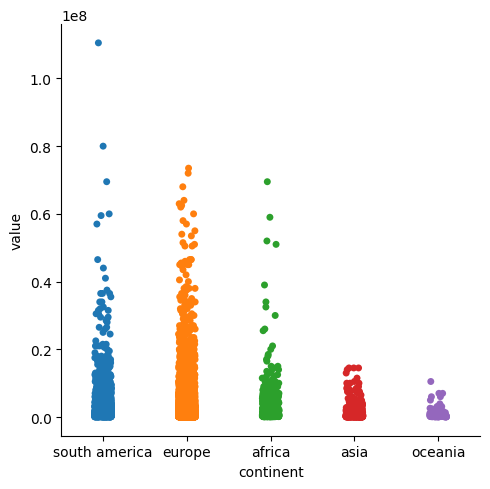

In [ ]:
#포지션과 이적료에 대한 분포를 catplot으로 시각화
sns.catplot(x='position', y='value', data=df, hue='position')
#출신대륙과 이적료에 대한 분포를 catplot으로 시각화
sns.catplot(x='continent', y='value', data=df, hue='continent')

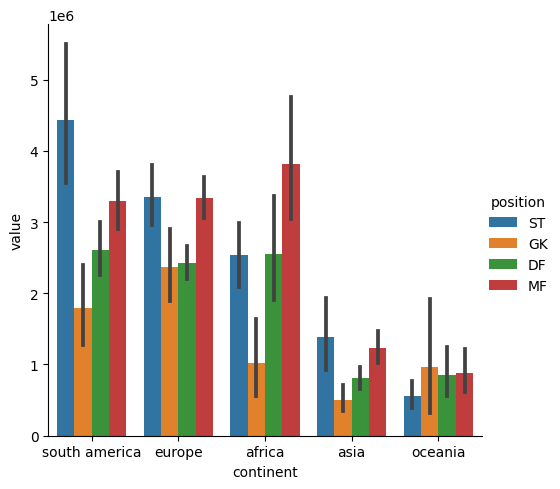

In [ ]:
#출신대륙('continent')별 이적료('value')를 포지션('position')으로 구분:catplot(kind='bar')
sns.catplot(kind='bar', x='continent', y='value', hue='position', data=df)

<Axes: xlabel='continent', ylabel='stat_potential'>

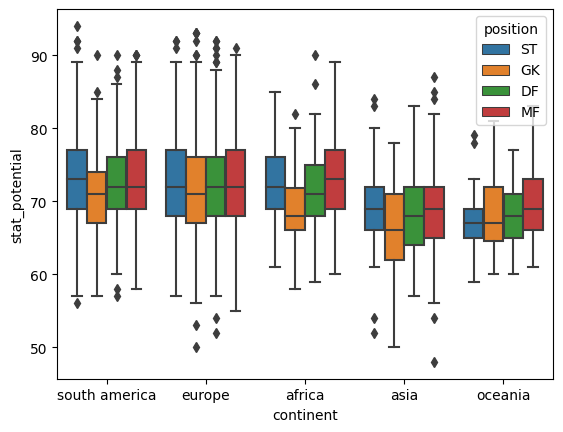

In [ ]:
#출신 대륙('continent')별 발전정도('stat_potential')를 포지션('position')으로 구분하여 박스플롯으로 시각화
sns.boxplot(x='continent', y='stat_potential', hue='position', data=df)

In [ ]:
#교차표 만들기:pd.crosstab
#row는 유명정도('reputation'), column은 나이('age')
#각 셀에는 이적료(vlaue)의 평균(소수첫째자리에서 반올림)
crosstab=pd.crosstab(df['reputation'], df['age'], values=df['value'], aggfunc='mean').round(0)
crosstab

age,16,17,18,19,20,21,22,23,24,25,...,31,32,33,34,35,36,37,38,39,40
reputation,,,,,,,,,,,,,,,,,,,,,
1.0,279167.0,429771.0,515029.0,834571.0,1254612.0,1755173.0,1725436.0,2284113.0,2216434.0,2212831.0,...,1654502.0,1227536.0,967203.0,870545.0,449462.0,343023.0,290909.0,109000.0,148000.0,155000.0
2.0,NaN,NaN,27000000.0,14000000.0,16000000.0,17500000.0,19600000.0,16062500.0,14805556.0,12905093.0,...,5477119.0,5038051.0,3307143.0,1908784.0,1555000.0,940278.0,1266875.0,319167.0,466000.0,NaN
3.0,NaN,NaN,NaN,29000000.0,10000000.0,40000000.0,34625000.0,25500000.0,33550000.0,40222222.0,...,17557895.0,13653333.0,7786667.0,6890909.0,4650000.0,1700000.0,8000000.0,325000.0,1600000.0,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64000000.0,...,31500000.0,44333333.0,16500000.0,13833333.0,6900000.0,3000000.0,NaN,NaN,NaN,4000000.0
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95250000.0,38000000.0,NaN,NaN,NaN,14000000.0,NaN,NaN,NaN,NaN


<Axes: xlabel='age', ylabel='reputation'>

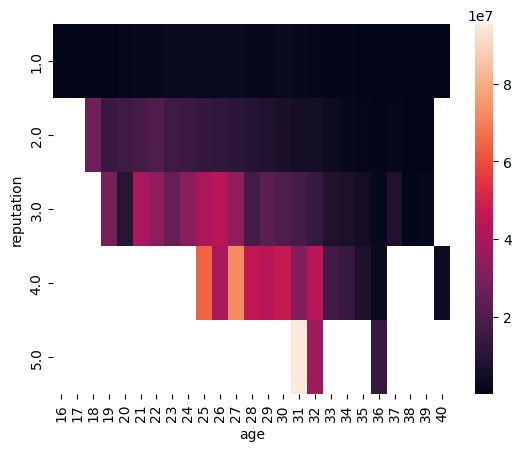

In [ ]:
#히트맵으로 시각화
sns.heatmap(crosstab)

<Axes: xlabel='age', ylabel='value'>

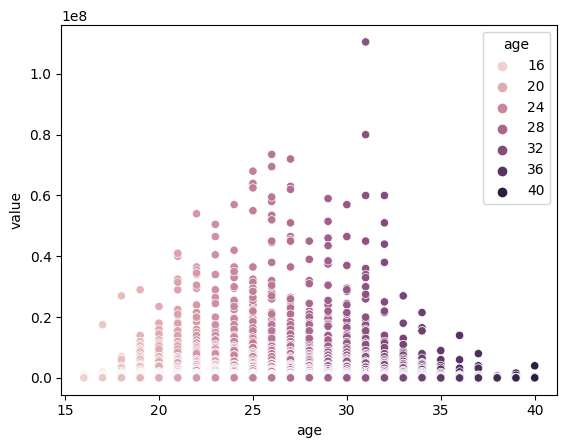

In [ ]:
#다양한 방법으로 시각화 해 보고 분석결과를 작성해 보자
#코랩 url을 패들렛에 작성할것

#1. 나이에 따른 이적료
sns.scatterplot(x='age', y='value', data=df, hue='age')

## 분석 결과: 25~26살 정도에 가장 평균적으로 이적료가 높다.

<Axes: xlabel='reputation', ylabel='value'>

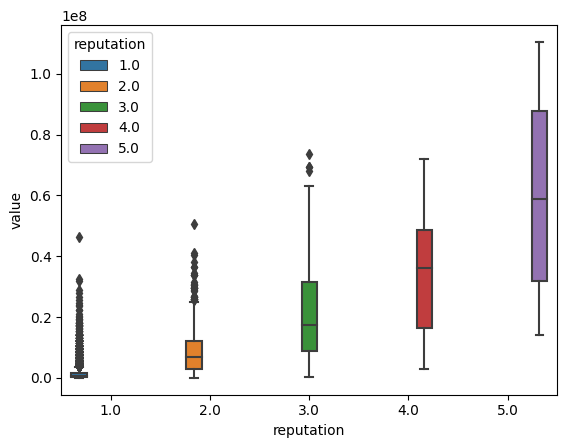

In [ ]:
#2. 유명도에 따른 이적료
sns.boxplot(data=df, x='reputation', y='value', hue='reputation')

##분석 결과: 유명도가 높을 수록 이적료가 높다.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'DF'), Text(1, 0, 'GK'), Text(2, 0, 'MF'), Text(3, 0, 'ST')])

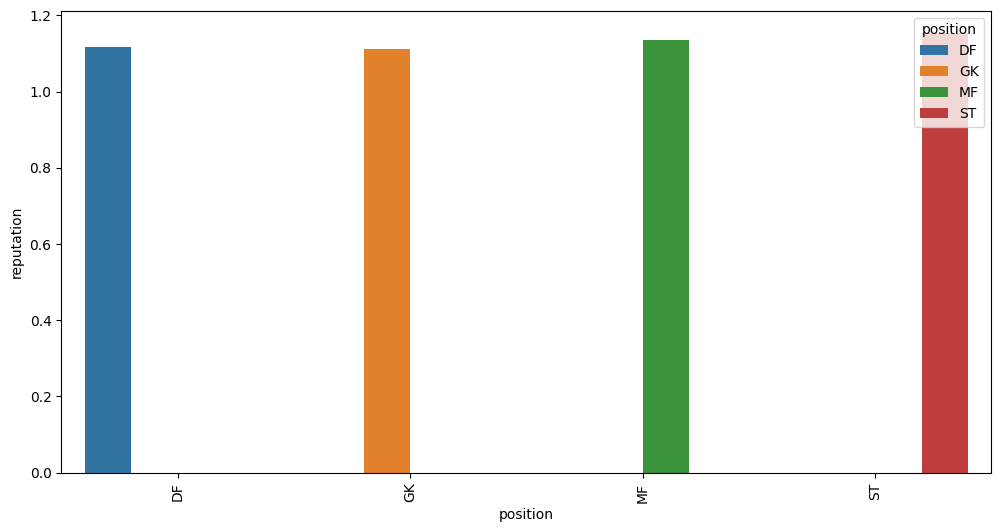

In [ ]:
#3. 포지션에 따른 유명도

position_reputation = df.groupby('position')['reputation'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='position', y='reputation', data=position_reputation, hue='position')
plt.xticks(rotation=90)

## 분석 결과: ST 포지션의 평균이 다른 포지션의 평균보다 살짝 높다.